## Hacer pruebas:

In [1]:
from skimage.measure import find_contours
import matplotlib.pyplot as plt
import numpy as np
from torchviz import make_dot
import torch
import cv2


In [2]:
# Mi libreria:
%load_ext autoreload
%autoreload 2
from processLIDC2 import Patient

In [3]:
# metodos = [m for m in dir(patient) if not '__' in m]
# print(metodos) 

In [4]:
patient = Patient("LIDC-IDRI-0121")
patient.get_all_nodules()
patient.scale()

Paciente: LIDC-IDRI-0121
___________________________________
Paciente del nodulo: LIDC-IDRI-0121
Primera slice con el nodulo 155
num. slices nodulo: 12
-----------
Paciente del nodulo: LIDC-IDRI-0121
Primera slice con el nodulo 161
num. slices nodulo: 5
-----------
Paciente del nodulo: LIDC-IDRI-0121
Primera slice con el nodulo 155
num. slices nodulo: 12
-----------
Paciente del nodulo: LIDC-IDRI-0121
Primera slice con el nodulo 161
num. slices nodulo: 5
-----------
Paciente del nodulo: LIDC-IDRI-0121
Primera slice con el nodulo 160
num. slices nodulo: 6
-----------
Paciente del nodulo: LIDC-IDRI-0121
Primera slice con el nodulo 155
num. slices nodulo: 12
-----------
Paciente del nodulo: LIDC-IDRI-0121
Primera slice con el nodulo 155
num. slices nodulo: 12
-----------
Paciente del nodulo: LIDC-IDRI-0121
Primera slice con el nodulo 160
num. slices nodulo: 6
-----------
___________________________________


In [5]:
# patient.plot_mask()

In [6]:
patient.reconstruct_body(nodulos = True)

52861


obteniendo los datos...


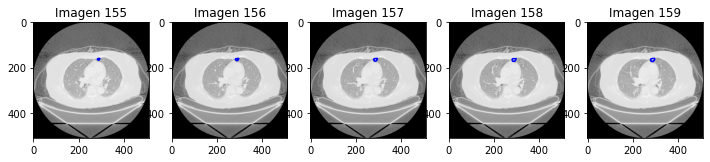

In [7]:
# Mostrar imagenes:
patient.imshow(slices=(155,156,157,158,159), scaled=True)

## Inferencia:

In [8]:
# Mi libreria:
%load_ext autoreload
%autoreload 2
from processLIDC2 import Patient
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
## Cargar modelos sin saber la estructura:
# model = torch.jit.load('/home/faraujo/TFM/processLIDC/trainings/training_wbce/model-epoch10.pt')
# model = torch.jit.load('/home/faraujo/TFM/processLIDC/trainings/training_wbce_40/model-epoch13.pt')
# model = torch.jit.load('/home/faraujo/TFM/processLIDC/trainings/training_wbce_iou/model-epoch13.pt')
# model = torch.jit.load('/home/faraujo/TFM/processLIDC/trainings/training3/model-epoch11.pt')
# model = torch.jit.load('/home/faraujo/TFM/processLIDC/trainings/training7/model-epoch98.pt')
model = torch.jit.load('../modelo_nuevo512.pt')
model.to('cuda') # # Si fue entrenado en grafica hay que abrirlo con tal 
model.eval()

RecursiveScriptModule(
  original_name=UNet
  (encoder1): RecursiveScriptModule(
    original_name=Sequential
    (enc1conv1): RecursiveScriptModule(original_name=Conv2d)
    (enc1relu1): RecursiveScriptModule(original_name=ReLU)
    (enc1conv2): RecursiveScriptModule(original_name=Conv2d)
    (enc1relu2): RecursiveScriptModule(original_name=ReLU)
  )
  (pool1): RecursiveScriptModule(original_name=MaxPool2d)
  (encoder2): RecursiveScriptModule(
    original_name=Sequential
    (enc2conv1): RecursiveScriptModule(original_name=Conv2d)
    (enc2relu1): RecursiveScriptModule(original_name=ReLU)
    (enc2conv2): RecursiveScriptModule(original_name=Conv2d)
    (enc2relu2): RecursiveScriptModule(original_name=ReLU)
  )
  (pool2): RecursiveScriptModule(original_name=MaxPool2d)
  (encoder3): RecursiveScriptModule(
    original_name=Sequential
    (enc3conv1): RecursiveScriptModule(original_name=Conv2d)
    (enc3relu1): RecursiveScriptModule(original_name=ReLU)
    (enc3conv2): RecursiveScriptMo

obteniendo los datos...
realizando inferencia...


/home/faraujo/TFM/processLIDC_2/app/processLIDC2.py:234: UserWarning:

No contour levels were found within the data range.



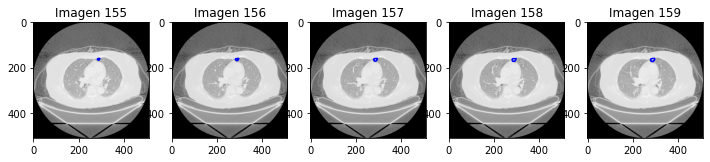

In [11]:
## Partiendo de la estructura de la red, cargamos el state:
# model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
#                        in_channels=3, out_channels=1, init_features=32, pretrained=True)
# model.load_state_dict(torch.load('model-epoch9.pth'))
# model.to('cuda') # # Si fue entrenado en grafica hay que abrirlo con tal 





# patient = Patient("LIDC-IDRI-0002")
# patient.scale()
patient.imshow(slices=(155,156),
               scaled=True, 
               label=True, 
               model=model,
               threshold = 0.2,
               path2save=None,
               gpu = True)

In [ ]:
torch.cuda.empty_cache()

In [ ]:
yolo segment train data=/home/abel/yolo-dataset-10pcent_background/train.yaml model=yolov8l-seg.pt epochs=150 imgsz=512 optimizer='Adamax'


SyntaxError: invalid syntax (842469785.py, line 1)

In [ ]:
yolo val data=/home/abel/yolo-dataset-include02/train.yaml model=/home/abel/yolo-dataset-include02/runs/segment_en_path_erroneo/train2/weights/best.pt conf=0.000001
